(50,)


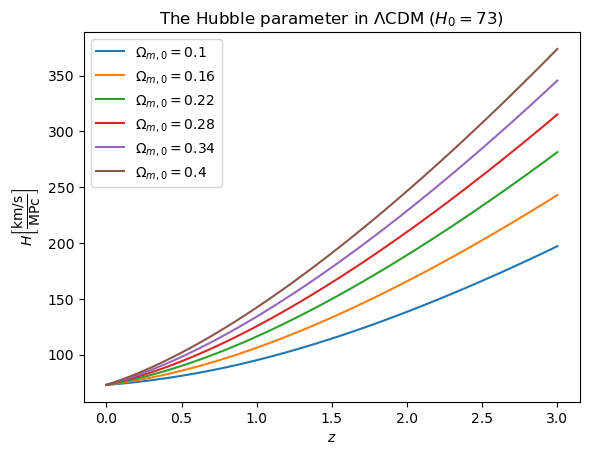

In [1]:
from Load_LCDM import *
import numpy as np

In [2]:
data_CC = np.loadtxt('data_CC.csv')
z_CC = data_CC[:,0]
H_CC = data_CC[:,1]
sigma_CC = data_CC[:,2]

data_BAO = np.loadtxt('data_BAO.csv')
z_BAO = data_BAO[:,0]
H_BAO = data_BAO[:,1]
sigma_BAO = data_BAO[:,2]

In [3]:
def log_likelihood(params, z, H, sigma):
    Omega0, H0 = params
    model = H_LCDM(z, Omega0, H0, x)
    
    l = -0.5 * np.sum((H - model) ** 2 / sigma**2)
    
    if np.isnan(l): return -np.inf
    
    else : return l

In [4]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.4,70]) + 0.1 * np.random.randn(2)
soln_CC = minimize(nll, initial, args=(z_CC, H_CC, sigma_CC))
soln_BAO = minimize(nll, initial, args=(z_BAO, H_BAO, sigma_BAO))
Omega_mlCC, H0_mlCC = soln_CC.x
Omega_mlBAO, H0_mlBAO = soln_BAO.x

print("Maximum likelihood estimates (CC):")
print("Omega = {0:.3f}".format(Omega_mlCC))
print("H0 = {0:.3f}".format(H0_mlCC))
print("Maximum likelihood estimates (BAO):")
print("Omega = {0:.3f}".format(Omega_mlBAO))
print("H0 = {0:.3f}".format(H0_mlBAO))

Maximum likelihood estimates (CC):
Omega = 0.320
H0 = 68.144
Maximum likelihood estimates (BAO):
Omega = 0.247
H0 = 70.855


100%|██████████| 5000/5000 [00:37<00:00, 132.45it/s]


'labels = ["$\\Omega_{m0}$", "$H_0$"]\nfor i in range(ndim):\n    ax = axes[i]\n    ax.plot(sampler_CC[:, :, i], "k", alpha=0.3)\n    ax.set_xlim(0, len(sampler_CC))\n    ax.set_ylabel(labels[i])\n    ax.yaxis.set_label_coords(-0.1, 0.5)\n\naxes[-1].set_xlabel("step number");'

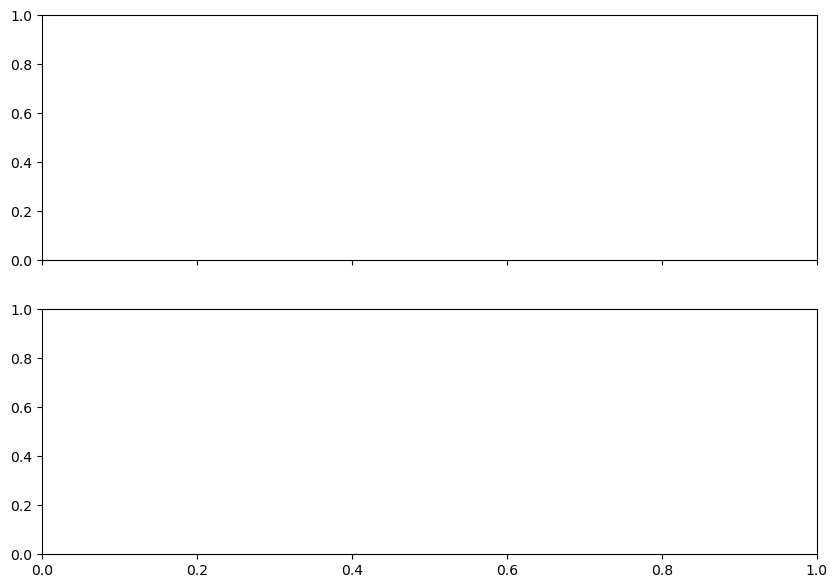

In [5]:
import emcee

pos_CC = soln_CC.x + 1e-4 * np.random.randn(32, 2)
pos_BAO = soln_BAO.x + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos_CC.shape

sampler_CC = emcee.EnsembleSampler(
    nwalkers, ndim, log_likelihood, args=(z_CC, H_CC, sigma_CC)
)

sampler_CC.run_mcmc(pos_CC, 5000, progress=True);

sampler_BAO = emcee.EnsembleSampler(
    nwalkers, ndim, log_likelihood, args=(z_BAO, H_BAO, sigma_BAO)
)
sampler_BAO.run_mcmc(pos_BAO, 5000, progress=True);


fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

'''labels = ["$\Omega_{m0}$", "$H_0$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler_CC[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(sampler_CC))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");'''

In [6]:
samples_CC = sampler_CC.get_chain()
samples_BAO = sampler_BAO.get_chain()


tau_CC = sampler_CC.get_autocorr_time()
print(tau_CC)

samples_CC = sampler_CC.get_chain(discard=100, thin=15, flat=True)
samples_BAO = sampler_BAO.get_chain(discard=100, thin=15, flat=True)
print(samples_CC.shape)

np.savetxt('samples_CC.csv', samples_CC)
np.savetxt('samples_BAO.csv', samples_BAO)

[32.77405785 30.61750594]
(10432, 2)


In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

GetDist Version: 1.4.3, Matplotlib version: 3.7.0


In [8]:
labels = ["\Omega_{m0}", "H_0"]
names = labels
samples1 = MCSamples(samples=samples_CC,names = names, labels = labels, label='CC')
samples2 = MCSamples(samples=samples_BAO,names = names, labels = labels, label='BAO')

Removed no burn in
Removed no burn in


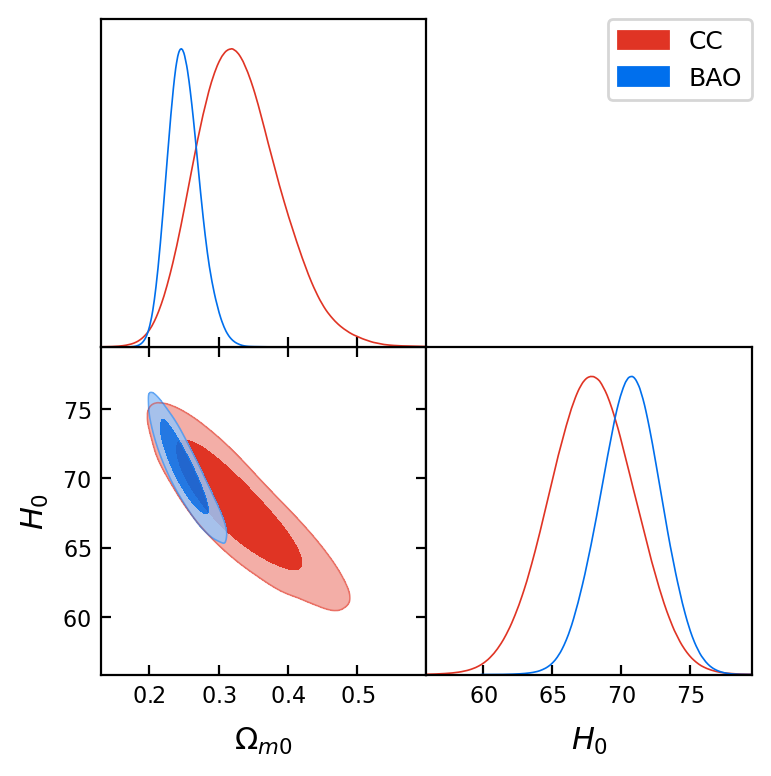

In [9]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples1,samples2], filled=True)

In [10]:
from IPython.display import display, Math

print('Cosmic Chronometers:\n')

for i in range(ndim):
    mcmc = np.percentile(samples_CC[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

print('\nBAO:\n')
    
for i in range(ndim):
    mcmc = np.percentile(samples_BAO[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

Cosmic Chronometers:



<IPython.core.display.Math object>

<IPython.core.display.Math object>


BAO:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# LCDM code

# NEW PROJECT:

## Dont limit to anything

## 